<a href="https://colab.research.google.com/github/roshan-shaik-ml/langchain-academy/blob/main/Lesson_1_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quickstart: LangGraph Essentials - Python
### Lesson 1: Nodes

[Check it out on Langchain Academy](https://academy.langchain.com/courses/take/langgraph-essentials-python/lessons/69419384-lesson-1-nodes)

[Course slides to checkout before code](https://academy.langchain.com/courses/take/langgraph-essentials-python/pdfs/69449571-course-slides)


- State : Data
- Node : Function
- Edges : Serial, Parallel, & Conditional
- Checkpointing/Memory
- Human In The Loop: Interrupts

In [ ]:
!pip install -U -q langgraph langchain

In [ ]:
import sys
print(f"Python version: {sys.version}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import START, END, StateGraph
from langgraph.types import Command, Interrupt

In [ ]:
# State can be TypedDict, Python Dataclass, Pydantic datatyp[e]
class State(TypedDict):

    nlist: List[str]

In [ ]:
def node_a(state: State) -> State:

    print(f"node a is receiving {state['nlist']}")
    note = "Hello world from node a"
    return (State(nlist = [note]))

In [ ]:
builder = StateGraph(State)
builder.add_node("a", node_a)
builder.add_edge(START, "a")
builder.add_edge("a", END)
graph = builder.compile()

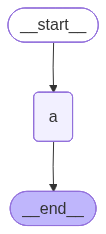

In [ ]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
initial_state = State(nlist = "Hello node a, how are you?")
graph.invoke(initial_state)

node a is receiving Hello node a, how are you?


{'nlist': ['Hello world from node a']}